# Ejercicio 1 - Inciso e) y f)
## Alumno: Marcelo Alberto Sanchez Zaragoza

In [132]:
import numpy as np
import mglearn
import IPython.display as ipd
import collections
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

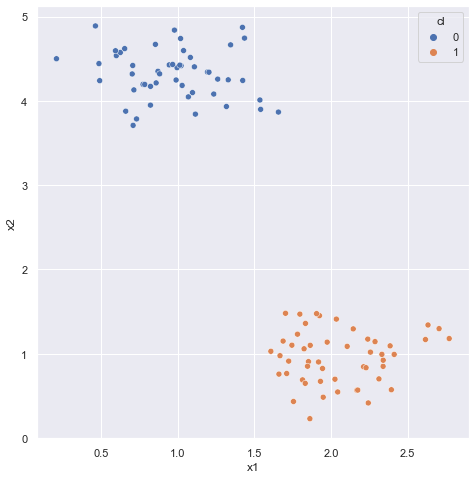

In [202]:
X, y, C = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=0.3, shuffle=True, random_state=0,return_centers=True)

data_toy = pd.DataFrame(X)
data_toy.columns = ['x1','x2']
data_toy = pd.DataFrame(data_toy).assign(cl = y)

fig = plt.figure(figsize = (6,6))
ax = fig.add_axes([0,0,1,1])
sns.scatterplot(x='x1', y='x2', hue='cl', data=data_toy)

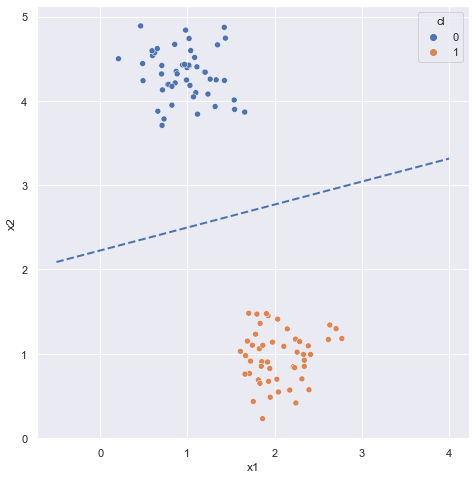

In [195]:
y0 = np.where( y==1, 1, -1)
t1 = data_toy.shape[0]/ sum(y0 == 1)
t2 = -data_toy.shape[0]/sum(y0 == -1)
data_toy['y_p'] = np.where(y0 == 1, t1, t2)
reg = LinearRegression().fit(X, data_toy['y_p'])
xx1 = np.linspace(-0.5,4,100)
xx2 = (reg.intercept_ + reg.coef_[0]*xx1)/(-1*reg.coef_[1])
ax.plot([xx1[0],xx1[99]],[xx2[0],xx2[99]],linestyle='--', linewidth=2)
fig

### Inciso f)
Empezamos a contemplar datos atípicos, los ingresamos de forma manual

In [196]:
new_fruit_list = [ (3.0, 2,0)]
dfNew=pd.DataFrame(new_fruit_list, columns = ['x1' , 'x2', 'cl'])
data_toy = data_toy.append(dfNew,ignore_index=True)

new_fruit_list = [ (3.0, 2.1,0)]
dfNew=pd.DataFrame(new_fruit_list, columns = ['x1' , 'x2', 'cl'])
data_toy = data_toy.append(dfNew,ignore_index=True)

new_fruit_list = [ (2.95, 2.2,0)]
dfNew=pd.DataFrame(new_fruit_list, columns = ['x1' , 'x2', 'cl'])
data_toy = data_toy.append(dfNew,ignore_index=True)

new_fruit_list = [ (2.98, 2.3,0)]
dfNew=pd.DataFrame(new_fruit_list, columns = ['x1' , 'x2', 'cl'])
data_toy = data_toy.append(dfNew,ignore_index=True)

new_fruit_list = [ (3.01, 2.281,0)]
dfNew=pd.DataFrame(new_fruit_list, columns = ['x1' , 'x2', 'cl'])
data_toy = data_toy.append(dfNew,ignore_index=True)

new_fruit_list = [ (3.02, 2.181,0)]
dfNew=pd.DataFrame(new_fruit_list, columns = ['x1' , 'x2', 'cl'])
data_toy = data_toy.append(dfNew,ignore_index=True)

new_fruit_list = [ (3.01, 2.151,0)]
dfNew=pd.DataFrame(new_fruit_list, columns = ['x1' , 'x2', 'cl'])
data_toy = data_toy.append(dfNew,ignore_index=True)

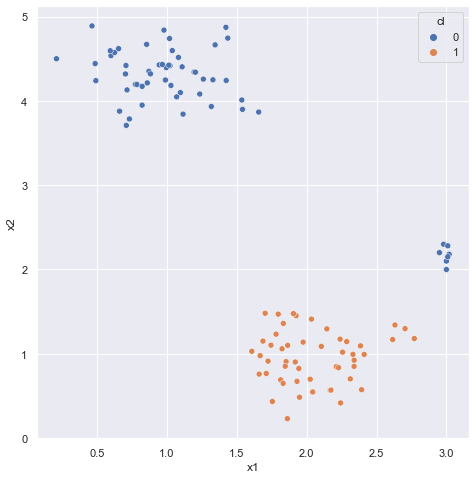

In [197]:
fig = plt.figure(figsize = (6,6))
ax = fig.add_axes([0,0,1,1])
sns.scatterplot(x='x1', y='x2', hue='cl', data=data_toy)

In [198]:
y = np.array(data_toy.iloc[:,2])
X = np.array(data_toy.iloc[:,0:2])
y0 = np.where(y==1, 1, -1)
t1 = data_toy.shape[0]/ sum(y0 == 1)
t2 = -data_toy.shape[0]/sum(y0 == -1)
data_toy['y_p'] = np.where(y0 == 1, t1, t2)

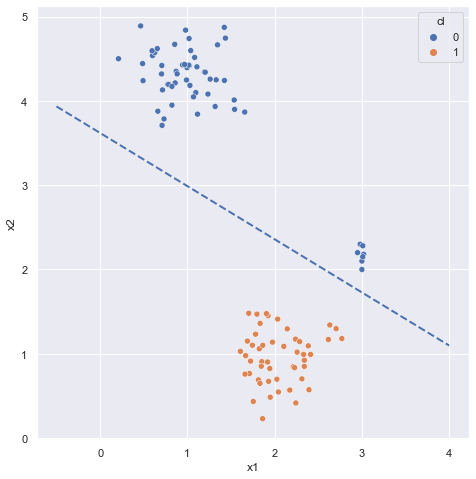

In [162]:
reg = LinearRegression().fit(X, data_toy['y_p'])
xx1 = np.linspace(-0.5,4,107)
xx2 = (reg.intercept_ + reg.coef_[0]*xx1)/(-1*reg.coef_[1])
ax.plot([xx1[0],xx1[106]],[xx2[0],xx2[106]],linestyle='--', linewidth=2)
fig

In [192]:
t1 = data_toy.shape[0]/ sum(y0 == 1)
t2 = -data_toy.shape[0]/sum(y0 == -1)
data_toy['y_p'] = np.where(y0 == 1, t1, t2)
dis = []
cen = C

for i in range(0, data_toy.shape[0]):
    if(data_toy.iloc[i, 2] ==0):
        dis.append(np.linalg.norm(cen[0]-data_toy.iloc[i,0:2]))
    elif(data_toy.iloc[i,2] == 1):
        dis.append(np.linalg.norm(cen[1]-data_toy.iloc[i,0:2]))

data_toy['d_c'] = dis
data_toy['pesos'] = 1/data_toy['d_c']

reg = LinearRegression().fit(data_toy[['x1','x2']], data_toy['y_p'], data_toy['pesos'])    

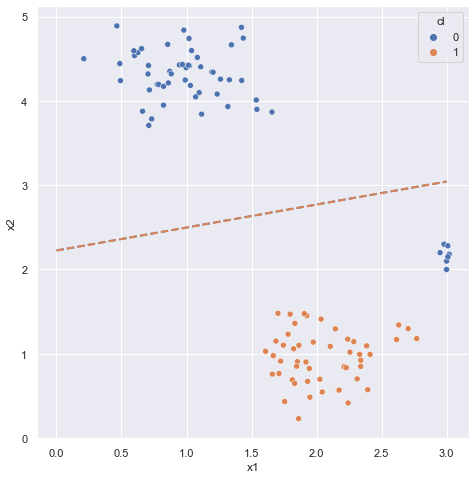

In [200]:
xx1 = np.linspace(0,3,107)
xx2 = (reg.intercept_ + reg.coef_[0]*xx1)/(-1*reg.coef_[1])
ax.plot([xx1[0],xx1[106]],[xx2[0],xx2[106]],linestyle='--', linewidth=2)
fig